# CSE422: Artificial Intelligence

## Lab Project

## Predicting Work Interest Using Machine Learning

### Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

### Data Exploration

In [ ]:
dataset = pd.read_csv("/content/Red mental health.csv")
dataset.shape

(86619, 17)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86619 entries, 0 to 86618
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Timestamp                86619 non-null  object
 1   Gender                   86619 non-null  object
 2   Country                  86619 non-null  object
 3   Occupation               86619 non-null  object
 4   self_employed            84845 non-null  object
 5   family_history           86619 non-null  object
 6   treatment                86619 non-null  object
 7   Days_Indoors             86619 non-null  object
 8   Growing_Stress           86619 non-null  object
 9   Changes_Habits           86619 non-null  object
 10  Mental_Health_History    86619 non-null  object
 11  Mood_Swings              86619 non-null  object
 12  Coping_Struggles         86619 non-null  object
 13  Work_Interest            86619 non-null  object
 14  Social_Weakness          86619 non-nul

In [ ]:
dataset.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


## Data Preprocessing

### Handling Null Values

In [ ]:
dataset.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,1774
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


In [ ]:
# dataset.drop('Timestamp', axis=1, inplace=True)
dataset.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# dataset.isnull().sum().sort_values(ascending=False).plot(kind='barh')
dataset.dropna(subset = ['self_employed'], inplace = True)

In [ ]:
dataset.fillna(dataset.mode().iloc[0],inplace=True)

In [ ]:
dataset.isnull().sum()

,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0
Mental_Health_History,0


### Handling Duplicate Values

In [ ]:
dataset.duplicated().sum()

54129

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.shape

(30716, 16)

## Imbalanced Data Representation

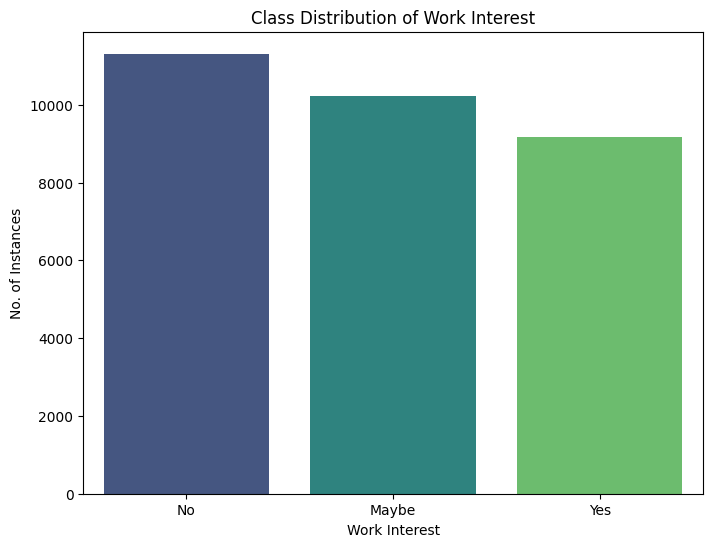

Class Distribution:
Work_Interest
No       11314
Maybe    10225
Yes       9177
Name: count, dtype: int64


In [ ]:
class_distribution = dataset["Work_Interest"].value_counts()

plt.figure(figsize = (8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, hue = class_distribution.index, palette = "viridis", legend=False)
plt.title("Class Distribution of Work Interest")
plt.xlabel("Work Interest")
plt.ylabel("No. of Instances")
plt.show()

print("Class Distribution:")
print(class_distribution)

## Encoding Categorical Values

In [ ]:
for col in dataset.columns:
  print("Unique values of column", col, "->", dataset[col].unique(), "\n")

Unique values of column Gender -> ['Female' 'Male'] 

Unique values of column Country -> ['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'Switzerland' 'Croatia' 'France' 'Italy' 'Thailand' 'Brazil'
 'Denmark' 'Mexico' 'Germany' 'Israel' 'Greece' 'Moldova' 'Colombia'
 'Georgia' 'Czech Republic' 'Philippines' 'Portugal' 'Costa Rica' 'Russia'
 'Finland' 'Bosnia and Herzegovina' 'Singapore' 'Nigeria'] 

Unique values of column Occupation -> ['Corporate' 'Student' 'Business' 'Housewife' 'Others'] 

Unique values of column self_employed -> ['No' 'Yes'] 

Unique values of column family_history -> ['Yes' 'No'] 

Unique values of column treatment -> ['Yes' 'No'] 

Unique values of column Days_Indoors -> ['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days'] 

Unique values of column Growing_Stress -> ['Yes' 'No' 'Maybe'] 

Unique values of column Changes_Habits -> ['No' 'Y

### Label Encoding

In [ ]:
one_hot_cols = ["Country", "Occupation", "Days_Indoors"]

for col in dataset.columns:
  if col not in one_hot_cols:
    enc = LabelEncoder()
    dataset[col] = enc.fit_transform(dataset[col])

dataset.tail()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
86597,1,Philippines,Business,0,0,0,15-30 days,1,0,1,1,1,1,0,1,0
86605,1,United Kingdom,Business,0,1,1,15-30 days,1,0,1,1,1,1,0,2,2
86610,1,Poland,Business,1,0,1,15-30 days,1,0,1,1,1,1,0,1,0
86614,1,United States,Business,1,1,1,15-30 days,1,0,1,1,1,1,0,0,1
86615,1,South Africa,Business,0,1,1,15-30 days,1,0,1,1,1,1,0,1,2


### One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset, columns = one_hot_cols)

dataset = dataset.astype(int)

dataset.head()

,Gender,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,...,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Days_Indoors_1-14 days,Days_Indoors_15-30 days,Days_Indoors_31-60 days,Days_Indoors_Go out Every day,Days_Indoors_More than 2 months
3,0,0,1,1,2,1,2,2,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1,2,1,2,2,0,1,...,0,1,0,0,0,1,0,0,0,0
5,0,0,0,1,2,1,2,2,0,1,...,0,1,0,0,0,1,0,0,0,0
6,0,0,1,1,2,1,2,2,0,1,...,0,1,0,0,0,1,0,0,0,0
7,0,0,0,0,2,1,2,2,0,1,...,0,1,0,0,0,1,0,0,0,0


## Correlation

In [ ]:
corr = dataset.corr()
corr

,Gender,self_employed,family_history,treatment,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,...,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,Days_Indoors_1-14 days,Days_Indoors_15-30 days,Days_Indoors_31-60 days,Days_Indoors_Go out Every day,Days_Indoors_More than 2 months
Gender,1.000000,0.159235,-0.235924,-0.155338,-0.063244,-0.025854,0.081169,-0.021006,-0.065741,-0.054582,...,-0.005211,-0.030584,-0.042865,-0.019919,0.089015,0.073504,-0.045671,-0.015179,-0.008364,-0.008089
self_employed,0.159235,1.000000,0.130159,0.143764,-0.010077,-0.004452,0.012895,-0.003428,-0.010830,-0.008722,...,-0.000718,-0.005394,-0.006721,-0.003068,0.014346,0.011162,-0.007179,-0.002301,-0.001215,-0.001056
family_history,-0.235924,0.130159,1.000000,0.284553,0.014917,0.006505,-0.019212,0.004962,0.015867,0.012914,...,0.001053,0.008029,0.009940,0.004533,-0.021252,-0.016718,0.010620,0.003397,0.001789,0.001789
treatment,-0.155338,0.143764,0.284553,1.000000,0.009812,0.004494,-0.012755,0.003199,0.010573,0.008522,...,0.000571,0.005845,0.006421,0.002867,-0.014156,-0.010706,0.006880,0.002108,0.001049,0.001234
Growing_Stress,-0.063244,-0.010077,0.014917,0.009812,1.000000,-0.099808,-0.067452,0.041163,0.061457,0.004048,...,0.075907,-0.004866,-0.014344,-0.057260,0.000060,0.072228,-0.030856,0.046553,-0.027383,-0.063933
Changes_Habits,-0.025854,-0.004452,0.006505,0.004494,-0.099808,1.000000,0.008977,0.116585,0.071070,-0.041080,...,0.001660,-0.011655,0.023950,0.082650,-0.086423,-0.013045,0.008904,0.014460,0.052484,-0.062173
Mental_Health_History,0.081169,0.012895,-0.019212,-0.012755,-0.067452,0.008977,1.000000,0.090605,0.010718,0.003253,...,-0.013315,-0.043801,0.006123,0.056300,-0.004849,0.034652,0.081857,-0.061956,0.072856,-0.123586
Mood_Swings,-0.021006,-0.003428,0.004962,0.003199,0.041163,0.116585,0.090605,1.000000,-0.022294,-0.040299,...,0.021041,0.061899,-0.045463,0.080641,-0.102372,-0.063928,0.078669,0.032345,-0.074159,0.032271
Coping_Struggles,-0.065741,-0.010830,0.015867,0.010573,0.061457,0.071070,0.010718,-0.022294,1.000000,-0.016940,...,0.049460,-0.076592,-0.022229,0.041304,0.007296,-0.003269,0.014257,-0.019452,0.020750,-0.011371
Work_Interest,-0.054582,-0.008722,0.012914,0.008522,0.004048,-0.041080,0.003253,-0.040299,-0.016940,1.000000,...,-0.028476,0.062870,0.086036,-0.070652,-0.047385,-0.024077,-0.044585,0.111453,-0.044715,-0.000530


### Correlation Heatmap (Features vs Features)

<Axes: >

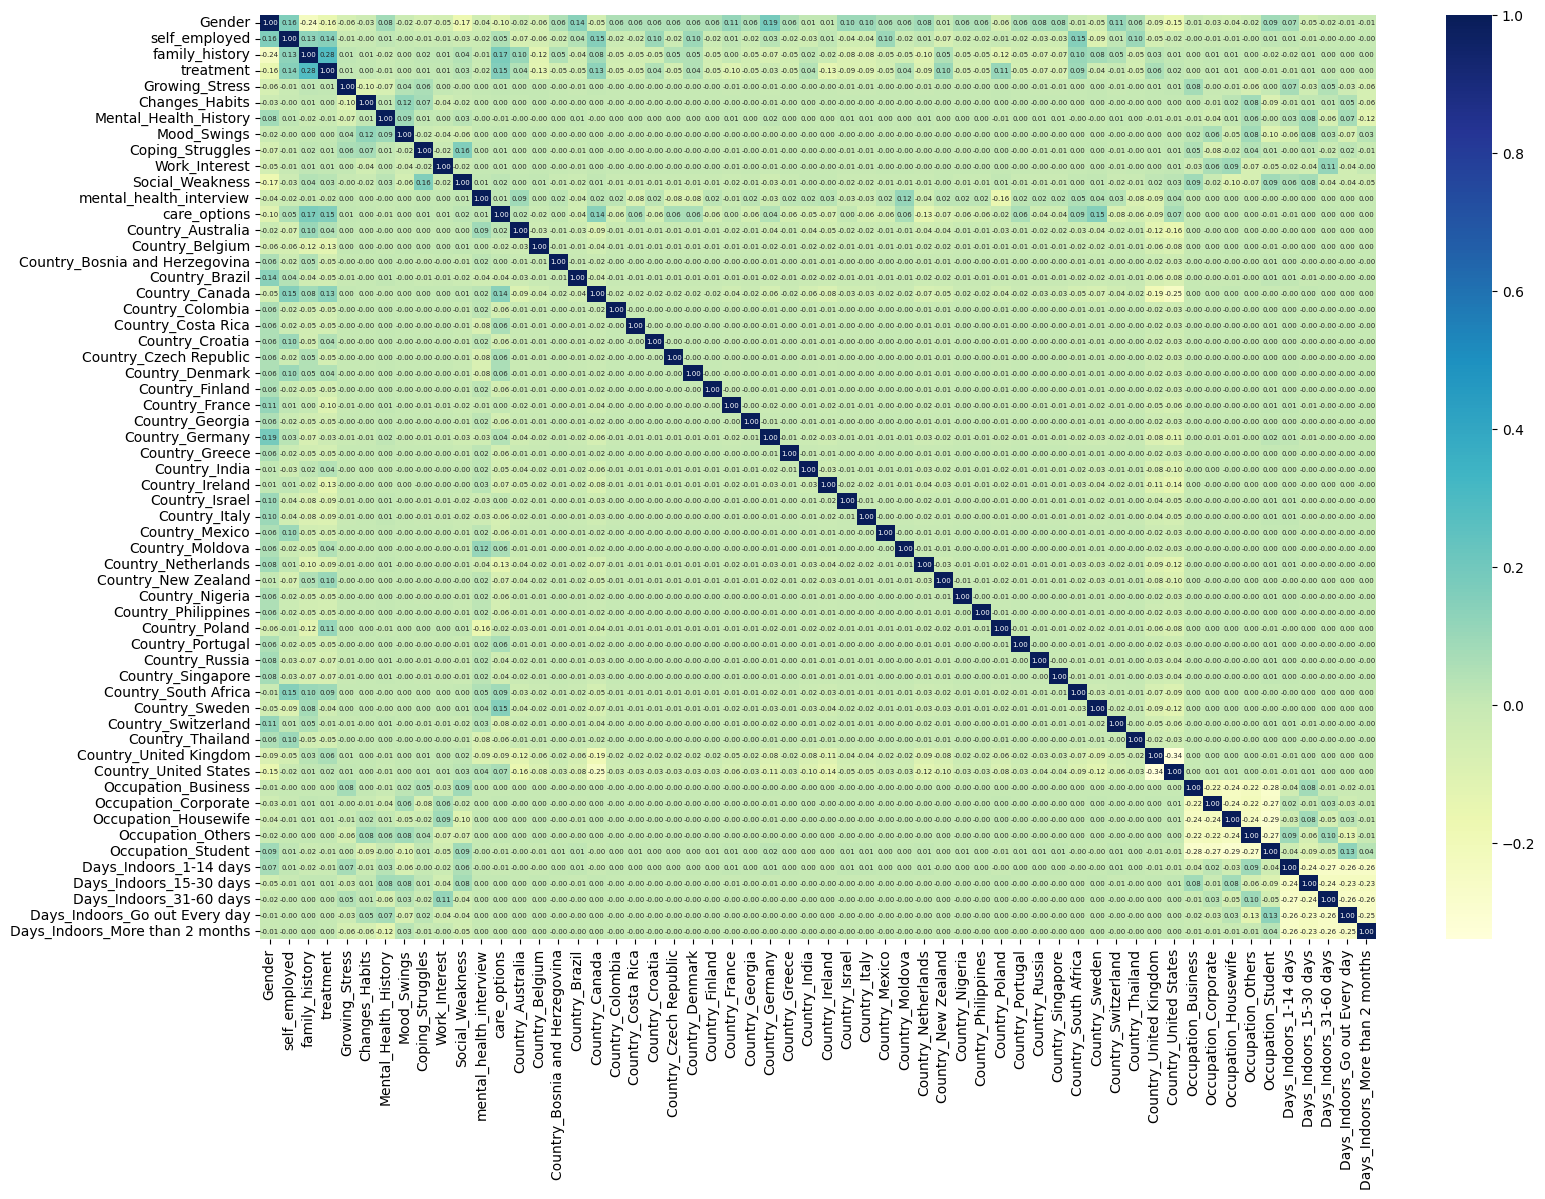

In [ ]:
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', annot_kws = {"size" : 5}, fmt=".2f")

In [ ]:
corr_matrix = dataset.corr()
corr_w_target = corr_matrix["Work_Interest"].drop("Work_Interest")
corr_w_target

,Work_Interest
Gender,-0.054582
self_employed,-0.008722
family_history,0.012914
treatment,0.008522
Growing_Stress,0.004048
Changes_Habits,-0.041080
Mental_Health_History,0.003253
Mood_Swings,-0.040299
Coping_Struggles,-0.016940
Social_Weakness,-0.017256


### Correlation Barplot (Features vs Target)

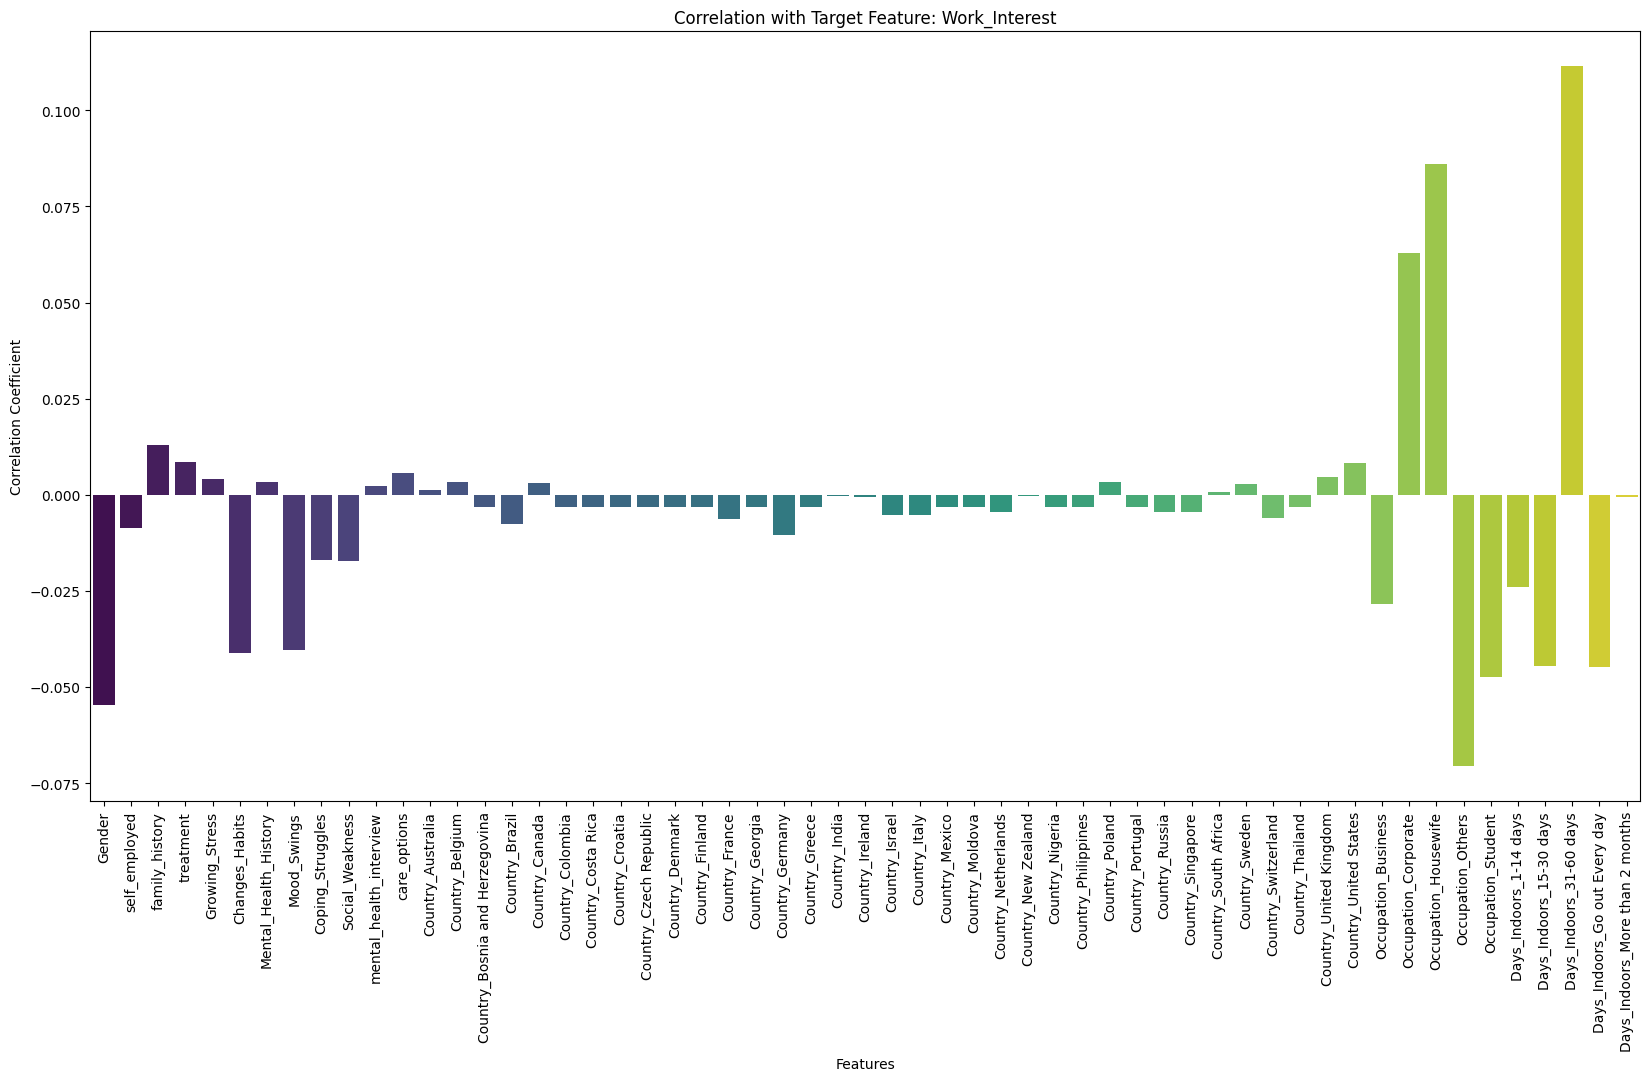

In [ ]:
corr_w_target = corr_w_target.squeeze()

plt.figure(figsize = (20, 10))
sns.barplot(x = corr_w_target.index, y = corr_w_target.values, hue = corr_w_target.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation with Target Feature: Work_Interest')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

## Model Training and Testing

In [ ]:
target_feature = dataset["Work_Interest"]

test_df = dataset.drop(["Work_Interest"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(test_df, target_feature, test_size = 0.3, random_state = 1, stratify = target_feature)

print(f"Training Set: x: {X_train.shape}, y: {y_train.shape}")
print(f"Testing Set: x: {X_test.shape}, y: {y_test.shape}")

Training Set: x: (21501, 57), y: (21501,)
Testing Set: x: (9215, 57), y: (9215,)


## Scaling features using MinMax Scaler

In [ ]:
# Scaling

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# transform train data
X_train_scaled = scaler.transform(X_train)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 Gender                             0
self_employed                      0
family_history                     0
treatment                          0
Growing_Stress                     0
Changes_Habits                     0
Mental_Health_History              0
Mood_Swings                        0
Coping_Struggles                   0
Social_Weakness                    0
mental_health_interview            0
care_options                       0
Country_Australia                  0
Country_Belgium                    0
Country_Bosnia and Herzegovina     0
Country_Brazil                     0
Country_Canada                     0
Country_Colombia                   0
Country_Costa Rica                 0
Country_Croatia                    0
Country_Czech Republic             0
Country_Denmark                    0
Country_Finland                    0
Country_France                     0
Country_Georgia                    0
Country_Germany                    0
C

In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average = "micro")
recall = recall_score(y_test, predictions, average = "micro")
conf_matrix = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
f1_score = f1_score(y_test, predictions, average = "micro")


print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1_score))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.47
Precision: 0.47
Recall: 0.47
F1-Score: 0.47
Confusion Matrix:
 [[1617 1002  449]
 [ 852 1896  646]
 [ 868 1102  783]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50      3068
           1       0.47      0.56      0.51      3394
           2       0.42      0.28      0.34      2753

    accuracy                           0.47      9215
   macro avg       0.46      0.46      0.45      9215
weighted avg       0.46      0.47      0.46      9215



### Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = "micro")
recall = recall_score(y_test, y_pred, average = "micro")
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
Confusion Matrix:
 [[3048   13    7]
 [  11 3372   11]
 [  12   12 2729]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3068
           1       0.99      0.99      0.99      3394
           2       0.99      0.99      0.99      2753

    accuracy                           0.99      9215
   macro avg       0.99      0.99      0.99      9215
weighted avg       0.99      0.99      0.99      9215



### Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train_scaled, y_train)


y_pred_rf = random_forest_model.predict(X_test_scaled)
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['No', 'Maybe', 'Yes']))

Random Forest:
Accuracy: 0.9953
[[3044   16    8]
 [   8 3386    0]
 [  11    0 2742]]
              precision    recall  f1-score   support

          No       0.99      0.99      0.99      3068
       Maybe       1.00      1.00      1.00      3394
         Yes       1.00      1.00      1.00      2753

    accuracy                           1.00      9215
   macro avg       1.00      1.00      1.00      9215
weighted avg       1.00      1.00      1.00      9215



### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test_scaled)
print("Test set predictions:\n", y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Test set predictions:
 [2 0 2 ... 0 0 1]


In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.61


### Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, predictions, average = "micro")
recall = recall_score(y_test, predictions, average = "micro")
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.39
Precision: 0.47
Recall: 0.47
Confusion Matrix:
 [[ 803  832 1433]
 [ 656 1170 1568]
 [ 442  691 1620]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.26      0.32      3068
           1       0.43      0.34      0.38      3394
           2       0.35      0.59      0.44      2753

    accuracy                           0.39      9215
   macro avg       0.40      0.40      0.38      9215
weighted avg       0.41      0.39      0.38      9215



### Multinomial Naive Bayes

In [ ]:
# Min-Max Scaling to ensure non-negative values

mnb_model = MultinomialNB()

mnb_model.fit(X_train_scaled, y_train)


y_pred_mnb = mnb_model.predict(X_test_scaled)


print("Multinomial Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb, target_names=['No', 'Maybe', 'Yes']))

Multinomial Naive Bayes:
Accuracy: 0.4505
Confusion Matrix:
[[1480 1104  484]
 [ 985 1748  661]
 [ 866  964  923]]
Classification Report:
              precision    recall  f1-score   support

          No       0.44      0.48      0.46      3068
       Maybe       0.46      0.52      0.48      3394
         Yes       0.45      0.34      0.38      2753

    accuracy                           0.45      9215
   macro avg       0.45      0.44      0.44      9215
weighted avg       0.45      0.45      0.45      9215



### Bernoulli Naive Bayes

In [ ]:
bnb_model = BernoulliNB()

bnb_model.fit(X_train, y_train)

y_pred_bnb = bnb_model.predict(X_test)

print("Bernoulli Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))
print("Classification Report:")
print(classification_report(y_test, y_pred_bnb, target_names=['No', 'Maybe', 'Yes']))

Bernoulli Naive Bayes:
Accuracy: 0.4651
Confusion Matrix:
[[1544  921  603]
 [ 959 1757  678]
 [ 847  921  985]]
Classification Report:
              precision    recall  f1-score   support

          No       0.46      0.50      0.48      3068
       Maybe       0.49      0.52      0.50      3394
         Yes       0.43      0.36      0.39      2753

    accuracy                           0.47      9215
   macro avg       0.46      0.46      0.46      9215
weighted avg       0.46      0.47      0.46      9215



## Evaluation Summary

Accuracy Score of LogisticRegression: 0.4662
Precision Score of LogisticRegression: 0.4605
Recall Score of LogisticRegression: 0.4662
F1-Score of LogisticRegression: 0.4662
Confusion Matrix:
[[1617 1002  449]
 [ 852 1896  646]
 [ 868 1102  783]]
Classification Report:
              precision    recall  f1-score   support

          No       0.48      0.53      0.50      3068
       Maybe       0.47      0.56      0.51      3394
         Yes       0.42      0.28      0.34      2753

    accuracy                           0.47      9215
   macro avg       0.46      0.46      0.45      9215
weighted avg       0.46      0.47      0.46      9215


--------------------------------------------------

Accuracy Score of DecisionTreeClassifier: 0.9928
Precision Score of DecisionTreeClassifier: 0.9928
Recall Score of DecisionTreeClassifier: 0.9928
F1-Score of DecisionTreeClassifier: 0.9928
Confusion Matrix:
[[3048   13    7]
 [  11 3372   11]
 [  12   12 2729]]
Classification Report:
            

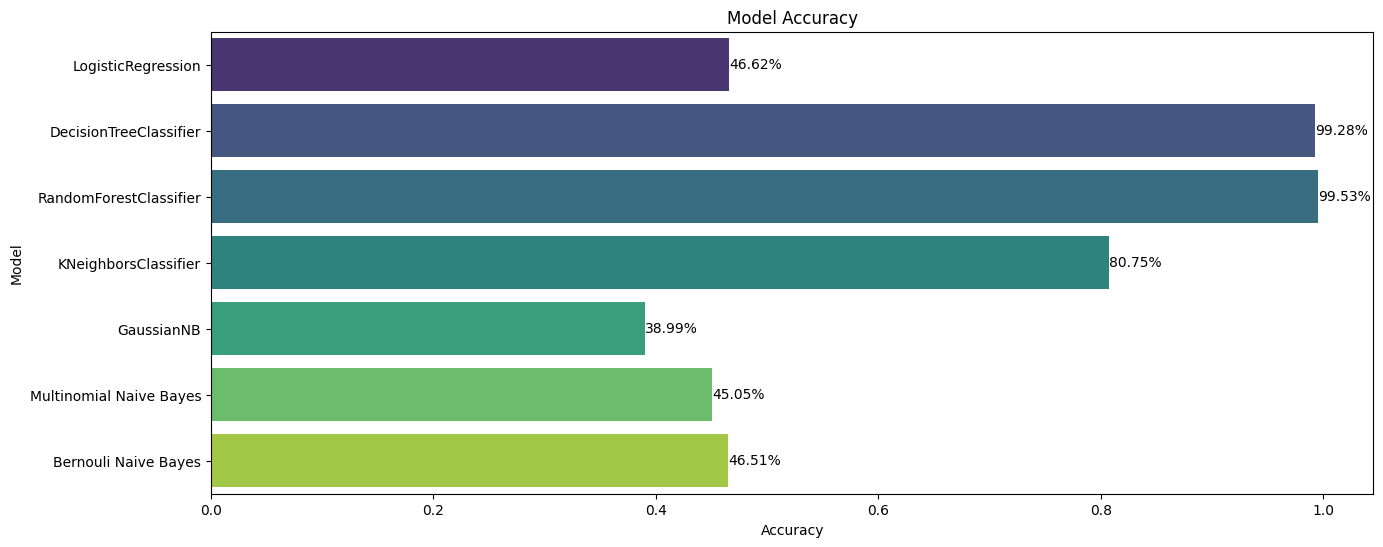

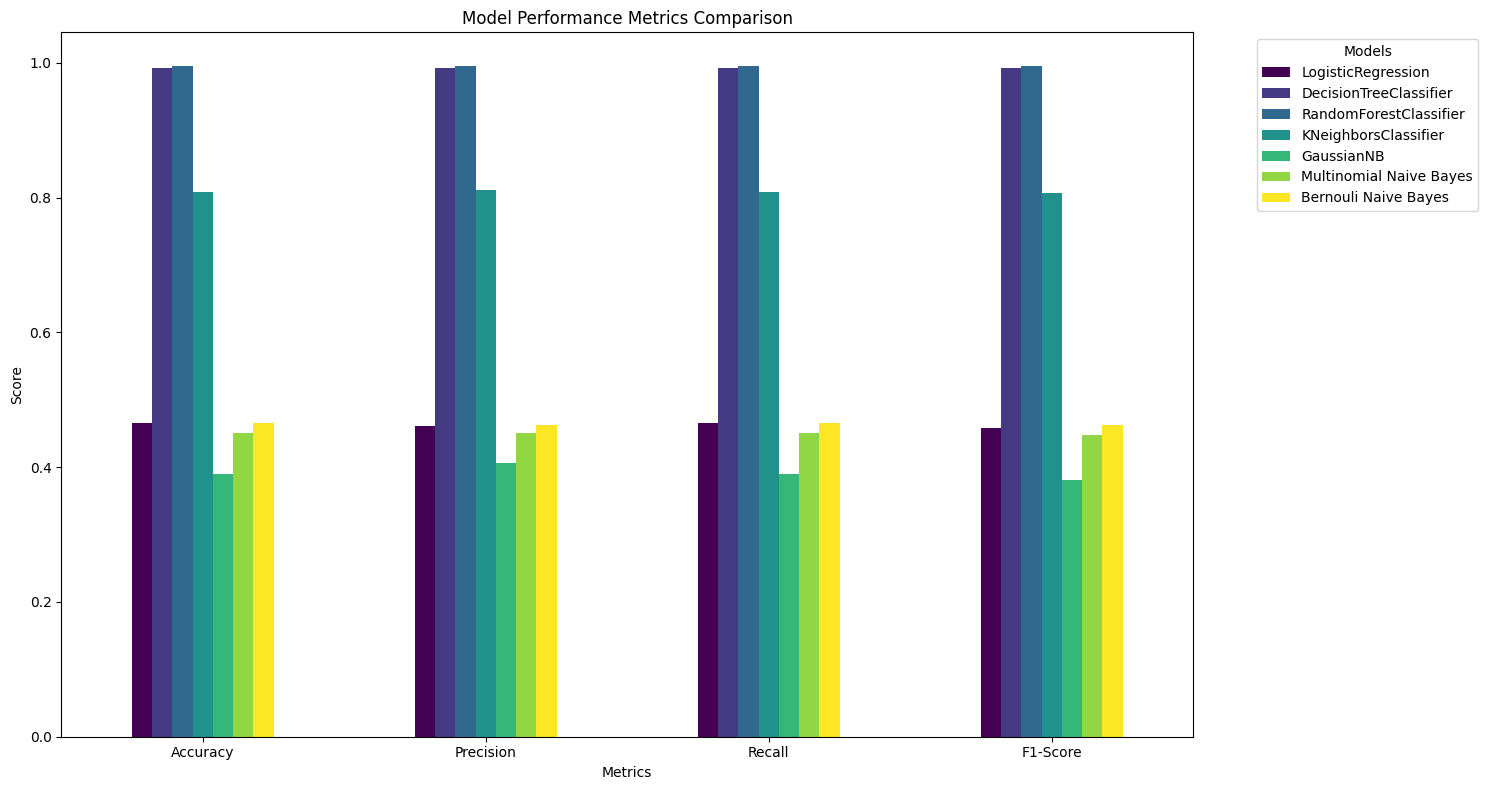

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernouli Naive Bayes': BernoulliNB()
}

precision_scores = {}
accuracy_scores = {}
recall_scores = {}
f1_scores = {}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1


    print(f"Accuracy Score of {name}: {accuracy:.4f}")
    print(f"Precision Score of {name}: {precision:.4f}")
    print(f"Recall Score of {name}: {recall:.4f}")
    print(f"F1-Score of {name}: {recall:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Maybe', 'Yes']))
    print("\n" + "-" * 50 + "\n")

plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_scores.values()), y=list(accuracy_scores.keys()), hue=list(accuracy_scores.keys()), palette='viridis', dodge=False)
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.legend([],[], frameon=False)
for i, v in enumerate(accuracy_scores.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()


metrics_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

metrics_df.T.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

